In [1]:
from models.grad_cam import CNN_grad_cam, heatmap_grad_cam, heatmap_in_image
import torch
import torchvision
import torch.nn as nn
from torchinfo import summary
import torchvision.transforms as transforms
from torch.utils import data
import numpy as np  
import matplotlib.pyplot as plt 
import cv2

In [2]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)

trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [22]:
data_for_grad_cam = torchvision.datasets.ImageFolder('archive/chest_xray/plot_grad_cam', transform=trans0)
dataloader = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

In [4]:
model_trained = torch.load('models/model.pth')

In [5]:
test_grad_cam = CNN_grad_cam(model_trained)

In [53]:
for i, (img, label) in enumerate(dataloader):
    if i == 6:
        break
label


tensor([1])

In [54]:
heatmap = heatmap_grad_cam(test_grad_cam, img)

In [55]:
joint_img = heatmap_in_image(img, heatmap, 0.9, .8)

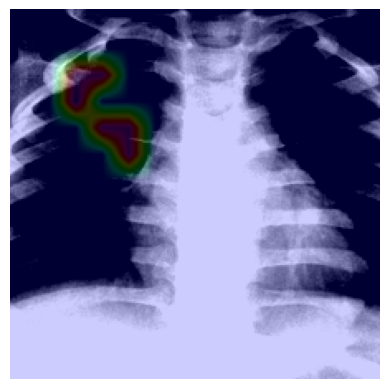

In [56]:
plt.imshow(joint_img)
plt.axis('off')
plt.show()